In [254]:
# =========================
# Import Libraries
# =========================

In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [256]:
# =========================
# Load Dataset
# =========================

In [257]:
df = sns.load_dataset("titanic")

In [258]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [259]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [260]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [261]:
df.describe(include="object")

C:\Users\TBARK\AppData\Local\Temp\ipykernel_22160\702825166.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include="object")


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [262]:
# =========================
# Missing Values Analysis
# =========================

In [263]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

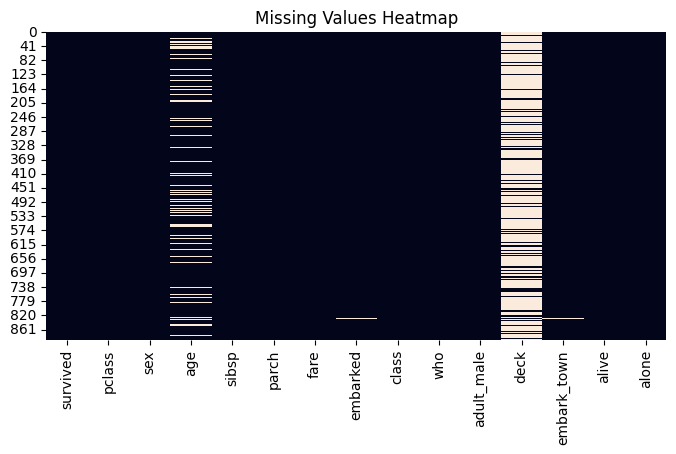

In [264]:
# Visualizing missing values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [265]:
# =========================
# Target Variable Analysis
# =========================

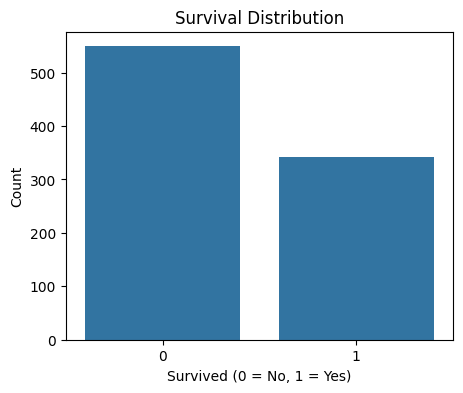

In [266]:
plt.figure(figsize=(5,4))
sns.countplot(x="survived", data=df)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [267]:
# =========================
# Exploratory Data Analysis
# =========================

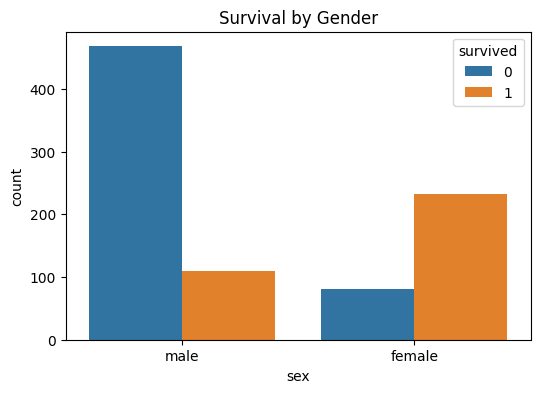

In [268]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival by Gender")
plt.show()


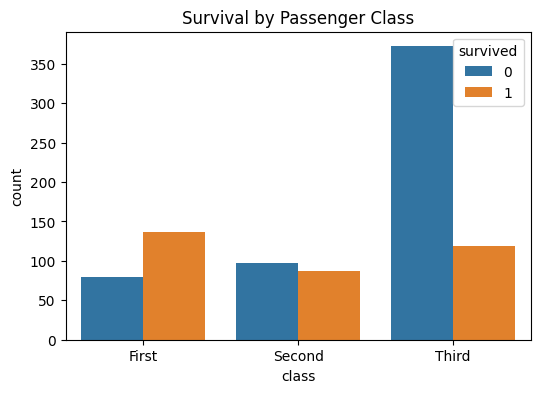

In [269]:
# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="class", hue="survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


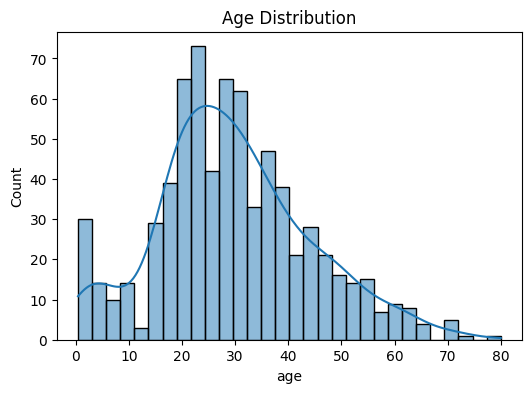

In [270]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


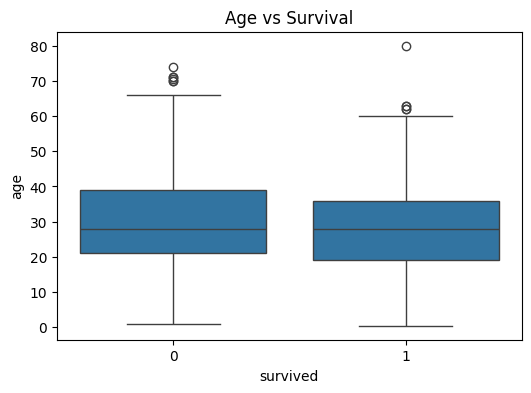

In [271]:
# Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age vs Survival")
plt.show()

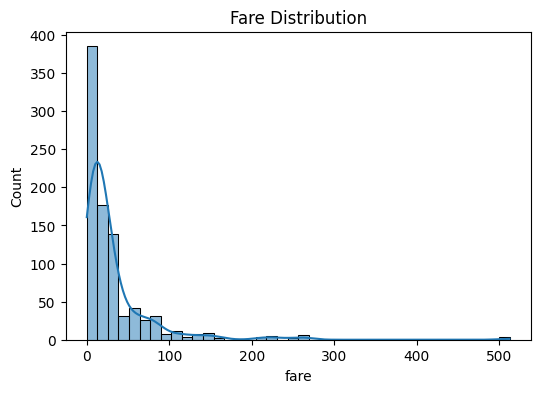

In [272]:
# Fare distribution
plt.figure(figsize=(6,4))
sns.histplot(df["fare"], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()


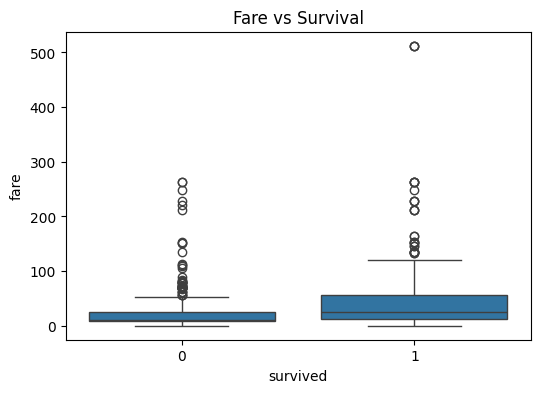

In [273]:
# Fare vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="survived", y="fare", data=df)
plt.title("Fare vs Survival")
plt.show()

In [274]:
# =========================
# Feature Engineering
# =========================

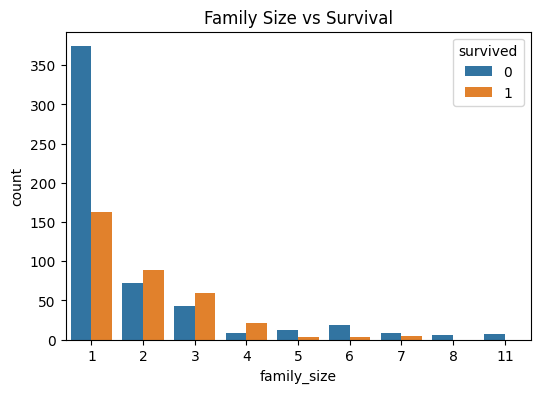

In [275]:
# Create family size feature
df["family_size"] = df["sibsp"] + df["parch"] + 1

plt.figure(figsize=(6,4))
sns.countplot(x="family_size", hue="survived", data=df)
plt.title("Family Size vs Survival")
plt.show()


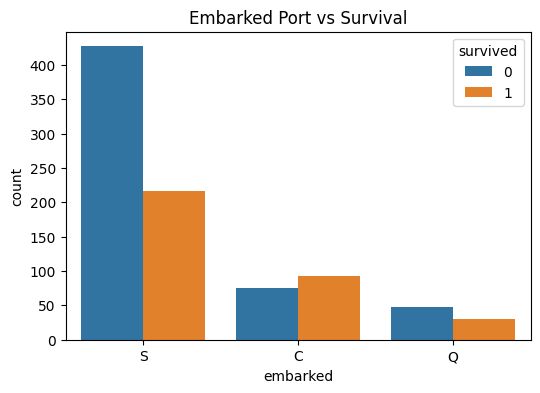

In [276]:
# Embarked vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x="embarked", hue="survived", data=df)
plt.title("Embarked Port vs Survival")
plt.show()


In [277]:
# =========================
# Correlation Analysis
# =========================

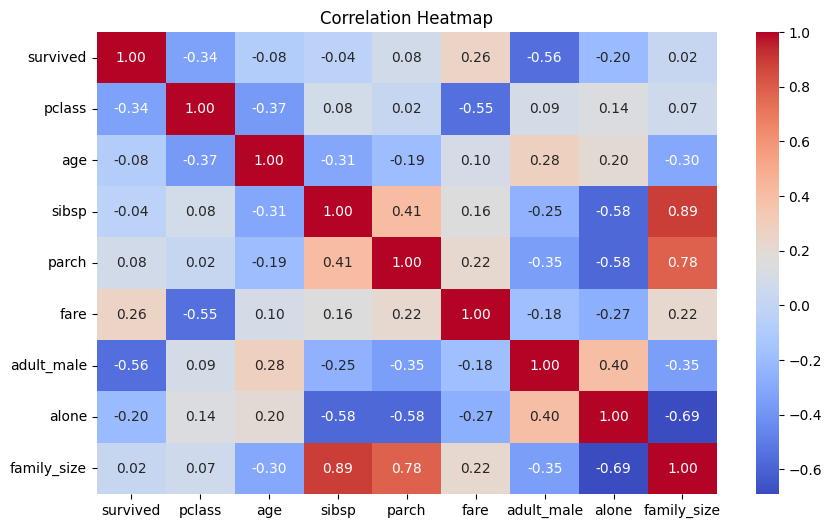

In [278]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


In [279]:
# =========================
# Data Cleaning
# =========================

In [280]:
df.drop(columns=["deck", "alive", "embark_town", "class", "who", "adult_male"], inplace=True)


In [281]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["fare"] = df["fare"].fillna(df["fare"].median())

In [282]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,False,2
1,1,1,female,38.0,1,0,71.2833,C,False,2
2,1,3,female,26.0,0,0,7.9250,S,True,1
3,1,1,female,35.0,1,0,53.1000,S,False,2
4,0,3,male,35.0,0,0,8.0500,S,True,1


In [283]:
df.duplicated().sum()

np.int64(116)

In [284]:
df.drop_duplicates(inplace= True)

In [285]:
# =========================
# Outlier Treatment (IQR Capping)
# =========================

<Axes: >

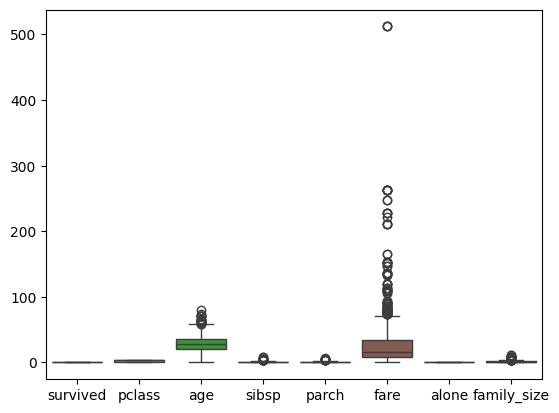

In [286]:
sns.boxplot(df)

In [287]:
def cap_outliers_iqr(df, columns):
    df = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df[col] = np.clip(df[col], lower, upper)
    
    return df


In [288]:
num_cols = ["age", "fare", "family_size"]
df = cap_outliers_iqr(df, num_cols)

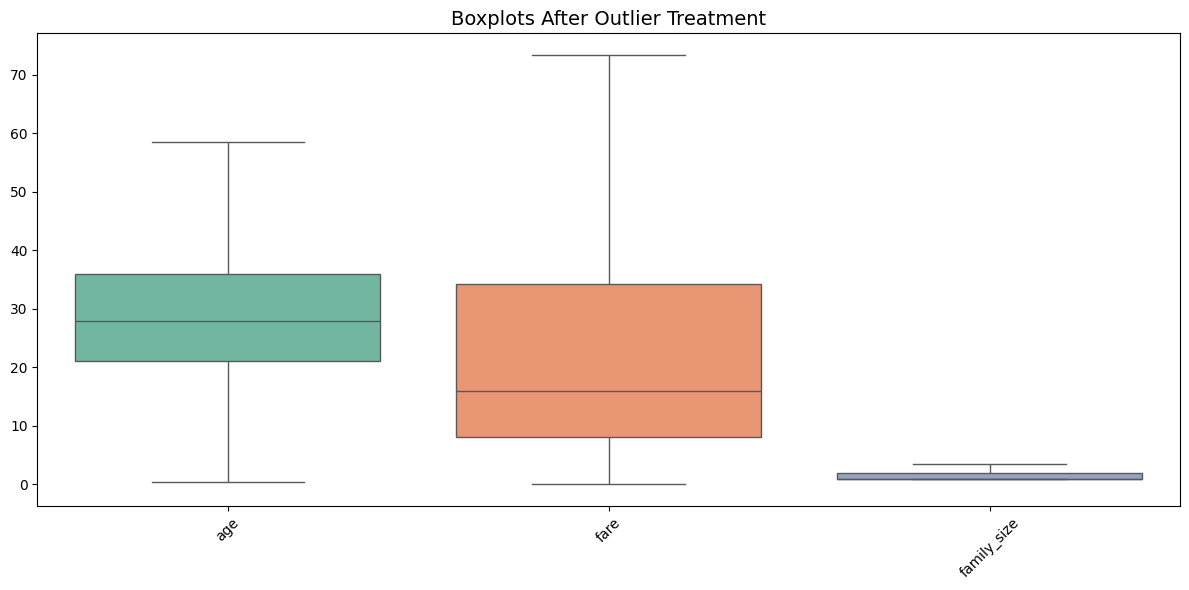

In [289]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.title("Boxplots After Outlier Treatment", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [290]:
# =========================
# Encoding
# =========================

In [291]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder(categories=[[1, 2, 3]])

df[['pclass']] = ordinal_encoder.fit_transform(df[['pclass']])

In [292]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])       # male/female → 0/1
df['alone'] = label_encoder.fit_transform(df['alone'])   # False/True → 0/1

In [293]:
one_hot_encoder = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

encoded = one_hot_encoder.fit_transform(df[['embarked']])

encoded_df = pd.DataFrame(
    encoded,
    columns=one_hot_encoder.get_feature_names_out(['embarked']),
    index=df.index
)

df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=['embarked'], inplace=True)


In [294]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,family_size,embarked_Q,embarked_S
0,0,2.0,1,22.0,1,0,7.2500,0,2.0,0.0,1.0
1,1,0.0,0,38.0,1,0,71.2833,0,2.0,0.0,0.0
2,1,2.0,0,26.0,0,0,7.9250,1,1.0,0.0,1.0
3,1,0.0,0,35.0,1,0,53.1000,0,2.0,0.0,1.0
4,0,2.0,1,35.0,0,0,8.0500,1,1.0,0.0,1.0


In [295]:
# =========================
# Handling Class Imbalance (SMOTE)
# =========================

<Axes: xlabel='survived', ylabel='count'>

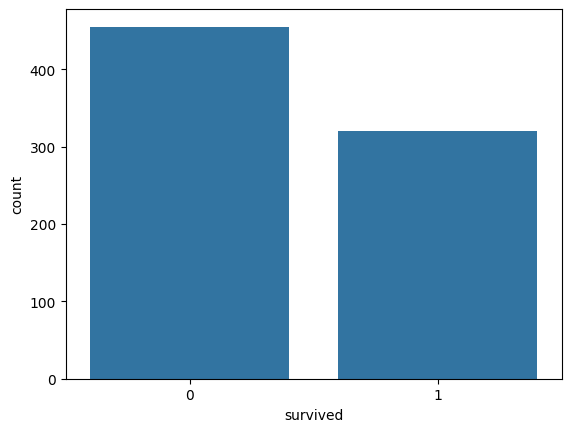

In [296]:
sns.countplot(data= df , x = "survived") 

In [297]:
df["survived"].value_counts(normalize=True)


survived
0    0.587097
1    0.412903
Name: proportion, dtype: float64

In [298]:
X = df.drop(columns=["survived"])
y = df["survived"]

In [299]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [300]:
y_res.value_counts(normalize=True)


survived
0    0.5
1    0.5
Name: proportion, dtype: float64

In [301]:
# =========================
# Train-Test Split
# =========================

In [302]:
from sklearn.model_selection  import train_test_split

X_train , X_test  , y_train  , y_test =train_test_split(X_res , y_res , test_size=0.2  ,  shuffle=True , random_state= 42 )

In [303]:
# =========================
# Feature Scaling
# =========================

In [304]:
from sklearn.preprocessing import StandardScaler

num_cols = ["age", "fare"]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [305]:
# =========================
# Model Training
# =========================

In [306]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty="l2", solver="liblinear", max_iter= 1000)

log_model.fit(X_train, y_train)

c:\Users\TBARK\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass`

In [307]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


In [308]:
# =========================
# Model Evaluation
# =========================

In [309]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8076923076923077
Precision: 0.8205128205128205
Recall: 0.7529411764705882
F1 Score: 0.7852760736196319


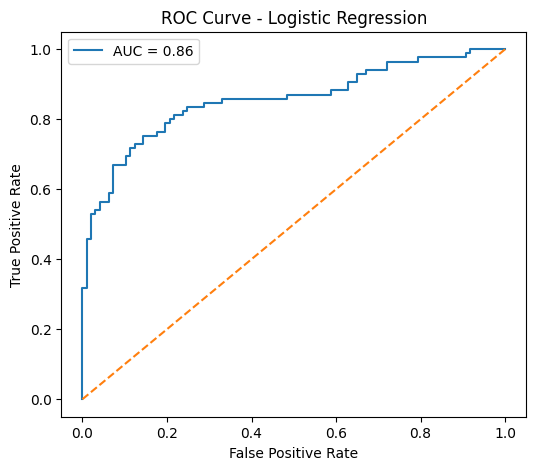

In [310]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [311]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        97
           1       0.82      0.75      0.79        85

    accuracy                           0.81       182
   macro avg       0.81      0.80      0.81       182
weighted avg       0.81      0.81      0.81       182

